# Data Cleaning

In [2]:
import pandas as pd

# Loading the dataset
file_path = "../Dataset/final_depression_dataset.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2556 non-null   object 
 1   Age                                    2556 non-null   int64  
 2   City                                   2556 non-null   object 
 3   Working Professional or Student        2556 non-null   object 
 4   Profession                             1883 non-null   object 
 5   Academic Pressure                      502 non-null    float64
 6   Work Pressure                          2054 non-null   float64
 7   CGPA                                   502 non-null    float64
 8   Study Satisfaction                     502 non-null    float64
 9   Job Satisfaction                       2054 non-null   float64
 10  Sleep Duration                         2556 non-null   object 
 11  Diet

In [3]:
# Checking for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Checking for missing values
print("Missing values in each column:\n", df.isnull().sum())

Number of duplicate rows: 0
Missing values in each column:
 Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64


In [4]:
# Fill missing values for numerical columns with -1
numerical_columns_with_na = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction']
df[numerical_columns_with_na] = df[numerical_columns_with_na].fillna(-1)

# Fill missing values for the 'Profession' column with 'Not Described'
df['Profession'] = df['Profession'].fillna('Not Described')

In [5]:
df

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,Ghaziabad,Working Professional,Teacher,-1.0,2.0,-1.0,-1.0,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Male,60,Kalyan,Working Professional,Financial Analyst,-1.0,4.0,-1.0,-1.0,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Female,42,Bhopal,Working Professional,Teacher,-1.0,2.0,-1.0,-1.0,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Female,44,Thane,Working Professional,Teacher,-1.0,3.0,-1.0,-1.0,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Male,48,Indore,Working Professional,UX/UI Designer,-1.0,4.0,-1.0,-1.0,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Male,25,Bangalore,Working Professional,Consultant,-1.0,1.0,-1.0,-1.0,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Female,23,Pune,Working Professional,Teacher,-1.0,3.0,-1.0,-1.0,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Female,24,Srinagar,Working Professional,HR Manager,-1.0,1.0,-1.0,-1.0,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Female,56,Bangalore,Working Professional,Business Analyst,-1.0,2.0,-1.0,-1.0,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


In [6]:
import os
from sklearn.preprocessing import OrdinalEncoder
import joblib

encoders_dir = "../Results/Encoders"
os.makedirs(encoders_dir, exist_ok=True)

# Features and categories in order
features = ['Sleep Duration', 'Dietary Habits', 'Degree']
categories = [['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'],
                ['Unhealthy', 'Moderate', 'Healthy'],
                ['Class 12', 'B.Com', 'M.Com', 'MD', 'BE', 'MCA', 'BA', 'LLM', 'BCA', 'B.Ed', 'M.Tech', 'LLB', 'B.Arch', 'ME', 'MA' 'MBA',
                 'M.Pharm', 'MBBS', 'PhD', 'BSc', 'MSc', 'MHM', 'BBA', 'BHM', 'B.Tech', 'M.Ed', 'B.Pharm']]

# Performing Ordinal Encoding
df[features] = df[features].astype(str)
encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)
df[features] = encoder.fit_transform(df[features])

# Saving encoder
joblib.dump(encoder, os.path.join(encoders_dir, 'ordinal_encoder.pkl'))

['../Results/Encoders/ordinal_encoder.pkl']

In [7]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Gender', 'City', 'Working Professional or Student', 'Profession',
                        'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

# Encoding each categorical column
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

    # Save the encoder to disk
    encoder_filepath = os.path.join(encoders_dir, f'{feature.replace(" ", "_").replace("/", "_").replace("?", "_")}_label_encoder.pkl')
    joblib.dump(le, encoder_filepath)

In [8]:
X = df.drop('Depression', axis=1)  # all features except the target
y = df['Depression']  # the target feature

# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling


Testing Model: LOGISTIC REGRESSION

Accuracy: 0.9902
Precision: 0.9902
Recall: 0.9902
F1 Score: 0.9902

--------------------------------------------------
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       429
           1       0.98      0.96      0.97        83

    accuracy                           0.99       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.99      0.99      0.99       512

--------------------------------------------------



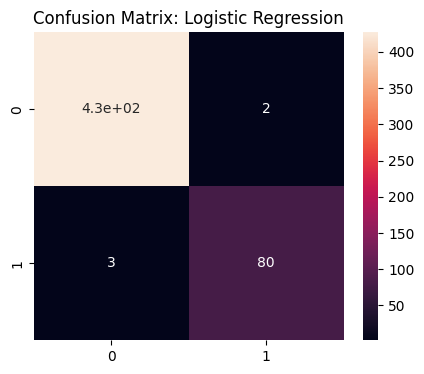


Testing Model: DECISION TREE

Accuracy: 0.9004
Precision: 0.9030
Recall: 0.9004
F1 Score: 0.9016

--------------------------------------------------
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       429
           1       0.68      0.72      0.70        83

    accuracy                           0.90       512
   macro avg       0.81      0.83      0.82       512
weighted avg       0.90      0.90      0.90       512

--------------------------------------------------



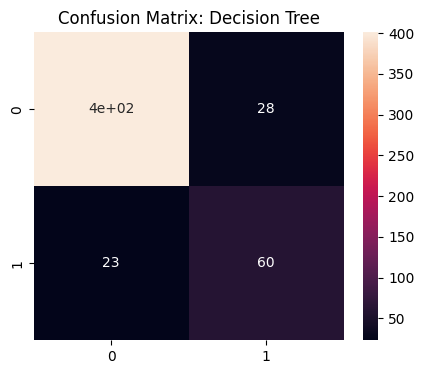


Testing Model: RANDOM FOREST

Accuracy: 0.9512
Precision: 0.9503
Recall: 0.9512
F1 Score: 0.9492

--------------------------------------------------
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       429
           1       0.93      0.76      0.83        83

    accuracy                           0.95       512
   macro avg       0.94      0.87      0.90       512
weighted avg       0.95      0.95      0.95       512

--------------------------------------------------



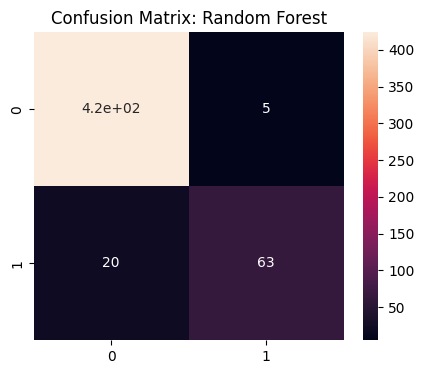


Testing Model: GRADIENT BOOSTING

Accuracy: 0.9551
Precision: 0.9541
Recall: 0.9551
F1 Score: 0.9540

--------------------------------------------------
Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       429
           1       0.91      0.81      0.85        83

    accuracy                           0.96       512
   macro avg       0.93      0.90      0.91       512
weighted avg       0.95      0.96      0.95       512

--------------------------------------------------



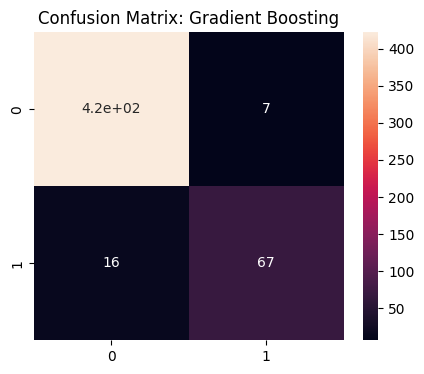

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
# Training and evaluating each model
for name, model in models.items():
    print("\n" + "="*50)
    print(f"Testing Model: {name.upper()}")
    print("="*50 + "\n")

    # Model training
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n" + "-"*50)
    print(f"{name} - Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-"*50 + "\n")

    # Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

In [10]:
# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.990234,0.990200,0.990234,0.990210
Decision Tree,0.900391,0.902968,0.900391,0.901555
Random Forest,0.951172,0.950337,0.951172,0.949166
Gradient Boosting,0.955078,0.954057,0.955078,0.954024
